In [1]:
# This code performs testing on video
import os
from ultralytics import YOLO
import cv2

# Paths
video_path = r"D:\IntegrationXpert\male & female classification (2)\testing\video5.mp4"
video_path_out = '{}_out.mp4'.format(os.path.splitext(video_path)[0])

# Video capture and writer setup
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# Model path
model_path = r"D:\IntegrationXpert\male & female classification (2)\runs\detect\train\weights\last.pt"

# Load the model
model = YOLO(model_path)  # load a custom model

# Threshold for score
threshold = 0.5

while ret:
    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            label = f"{results.names[int(class_id)].upper()} {score:.2f}"
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, label, (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()



0: 384x640 4 males, 5 females, 93.4ms
Speed: 2.4ms preprocess, 93.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 males, 7 females, 77.6ms
Speed: 3.0ms preprocess, 77.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 males, 5 females, 71.6ms
Speed: 3.0ms preprocess, 71.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 males, 4 females, 76.3ms
Speed: 2.0ms preprocess, 76.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 males, 9 females, 76.9ms
Speed: 4.0ms preprocess, 76.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 males, 7 females, 73.9ms
Speed: 3.0ms preprocess, 73.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 males, 6 females, 76.2ms
Speed: 2.0ms preprocess, 76.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 males, 7 females, 76.3ms
Speed: 3.


0: 416x640 5 males, 2 females, 116.1ms
Speed: 2.4ms preprocess, 116.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


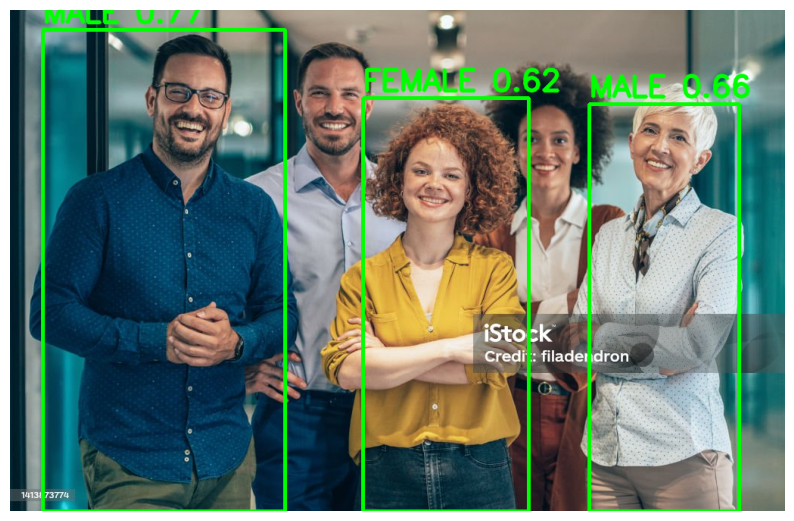

In [13]:
# This code performs testing on image
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Paths
image_path = r"D:\IntegrationXpert\male & female classification (2)\testing\istockphoto-1413873774-1024x1024.jpg"
output_image_path = '{}_out.jpg'.format(os.path.splitext(image_path)[0])
model_path = r"D:\IntegrationXpert\male & female classification (2)\runs\detect\train\weights\last.pt"

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Load the model
model = YOLO(model_path)  # load a custom model

# Inference
results = model(image)[0]

# Draw bounding boxes and labels
threshold = 0.5
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        label = f"{results.names[int(class_id)].upper()} {score:.2f}"
        cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(image_rgb, label, (int(x1), int(y1 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

# Save the output image
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving

# Plot the image with matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [1]:
# This code performs testing on video and saves the face cropped images in another directory
import os
from mtcnn import MTCNN
import cv2
from ultralytics import YOLO

# Paths
video_path = r"D:\IntegrationXpert\male & female classification (2)\testing\video3.mp4"
video_path_out = '{}_out.mp4'.format(os.path.splitext(video_path)[0])

# Video capture and writer setup
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# Model paths
model_path = r"D:\IntegrationXpert\male & female classification (2)\runs\detect\train\weights\last.pt"
face_cropped_dir = r"D:\IntegrationXpert\male & female classification (2)\cropped_faces"

# Load the YOLO model
model = YOLO(model_path)  # load a custom model

# Initialize MTCNN
mtcnn = MTCNN()

# Threshold for YOLO score
threshold = 0.5

# Create directories for cropped faces if they don't exist
os.makedirs(face_cropped_dir, exist_ok=True)

# Padding for the face box
padding = 20  # adjust padding as needed

while ret:
    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            # Crop the face using MTCNN
            face = frame[int(y1):int(y2), int(x1):int(x2)]
            mtcnn_results = mtcnn.detect_faces(face)
            
            if mtcnn_results:
                for face_result in mtcnn_results:
                    face_box = face_result['box']
                    x, y, w, h = face_box
                    
                    # Adding padding
                    x = max(0, x - padding)
                    y = max(0, y - padding)
                    w = min(w + 2 * padding, face.shape[1] - x)
                    h = min(h + 2 * padding, face.shape[0] - y)

                    cropped_face = face[y:y+h, x:x+w]

                    # Save the cropped face in the corresponding directory
                    class_dir = os.path.join(face_cropped_dir, results.names[int(class_id)].lower())
                    os.makedirs(class_dir, exist_ok=True)
                    face_filename = os.path.join(class_dir, f"{os.path.splitext(os.path.basename(video_path))[0]}_{int(x1)}_{int(y1)}.jpg")
                    cv2.imwrite(face_filename, cropped_face)

            # Draw bounding box and label on the frame
            label = f"{results.names[int(class_id)].upper()} {score:.2f}"
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, label, (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()



0: 384x640 5 males, 6 females, 240.4ms
Speed: 11.1ms preprocess, 240.4ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━

In [16]:
import os
from mtcnn import MTCNN
import cv2
from ultralytics import YOLO
from facenet_pytorch import InceptionResnetV1
import torch
from scipy.spatial.distance import cosine

# Paths
video_path = r"D:\IntegrationXpert\male & female classification (2)\testing\video3.mp4"
video_path_out = '{}_out.mp4'.format(os.path.splitext(video_path)[0])

# Video capture and writer setup
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# Model paths
model_path = r"D:\IntegrationXpert\male & female classification (2)\runs\detect\train\weights\last.pt"
face_cropped_dir = r"D:\IntegrationXpert\male & female classification (2)\unique faces"

# Load the YOLO model
model = YOLO(model_path)  # load a custom model

# Initialize MTCNN
mtcnn = MTCNN()

# Initialize the face embedding model
embedding_model = InceptionResnetV1(pretrained='vggface2').eval()
saved_embeddings = []

# Threshold for YOLO score
threshold = 0.5

# Cosine similarity threshold (adjustable)
similarity_threshold = 0.5

# Create directories for cropped faces if they don't exist
os.makedirs(face_cropped_dir, exist_ok=True)

# Padding for the face box
padding = 20  # adjust padding as needed

def get_embedding(face):
    face = cv2.resize(face, (160, 160))
    face = torch.tensor(face).permute(2, 0, 1).float().unsqueeze(0)
    face = face / 255.0  # Normalize the face
    with torch.no_grad():
        embedding = embedding_model(face)
    return embedding.squeeze().numpy()

while ret:
    results = model(frame)[0]
    print("YOLO Results:", results.boxes.data.tolist())  # Debug: Print YOLO results

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            # Crop the face using MTCNN
            face = frame[int(y1):int(y2), int(x1):int(x2)]
            mtcnn_results = mtcnn.detect_faces(face)
            print("MTCNN Results:", mtcnn_results)  # Debug: Print MTCNN results
            
            if mtcnn_results:
                for face_result in mtcnn_results:
                    face_box = face_result['box']
                    x, y, w, h = face_box
                    
                    # Adding padding
                    x = max(0, x - padding)
                    y = max(0, y - padding)
                    w = min(w + 2 * padding, face.shape[1] - x)
                    h = min(h + 2 * padding, face.shape[0] - y)

                    cropped_face = face[y:y+h, x:x+w]
                    print("Cropped Face Shape:", cropped_face.shape)  # Debug: Print the shape of the cropped face

                    # Get embedding of the cropped face
                    embedding = get_embedding(cropped_face)
                    # Check if similar face exists
                    is_unique = True
                    for saved_embedding in saved_embeddings:
                        similarity = 1 - cosine(embedding, saved_embedding)
                        if similarity > similarity_threshold:
                            is_unique = False
                            break
                    
                    if is_unique:
                        saved_embeddings.append(embedding)
                        
                        # Save the cropped face
                        class_dir = os.path.join(face_cropped_dir, results.names[int(class_id)].lower())
                        print("Class Directory:", class_dir)  # Debug: Print class directory
                        os.makedirs(class_dir, exist_ok=True)
                        face_filename = os.path.join(class_dir, f"{os.path.splitext(os.path.basename(video_path))[0]}_{int(x1)}_{int(y1)}.jpg")
                        print("Saving Face to:", face_filename)  # Debug: Print the file path
                        cv2.imwrite(face_filename, cropped_face)

            # Draw bounding box and label on the frame
            label = f"{results.names[int(class_id)].upper()} {score:.2f}"
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, label, (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()



0: 384x640 5 males, 6 females, 113.5ms
Speed: 3.5ms preprocess, 113.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)
YOLO Results: [[1158.089111328125, 383.08758544921875, 1247.5738525390625, 666.3863525390625, 0.9335352778434753, 0.0], [701.969970703125, 364.9442138671875, 903.750732421875, 990.841064453125, 0.8487633466720581, 1.0], [1254.7757568359375, 385.0851745605469, 1406.6243896484375, 932.4236450195312, 0.7234967947006226, 1.0], [1398.0025634765625, 406.7815246582031, 1637.255126953125, 1054.051025390625, 0.6816399693489075, 1.0], [597.98828125, 397.2706604003906, 706.3023071289062, 726.1285400390625, 0.6631109714508057, 1.0], [101.91197204589844, 357.41656494140625, 367.6965026855469, 1080.0, 0.6630245447158813, 1.0], [92.74530029296875, 344.9142150878906, 365.5430603027344, 1080.0, 0.5910866260528564, 0.0], [0.0, 374.80755615234375, 120.73100280761719, 1080.0, 0.49636462330818176, 1.0], [370.1120910644531, 385.32000732421875, 518.7227783203125, 817.34106